# Regression Problem : California housing price
- The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).
- This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).
- https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
- The most classic dataset for this task is 'Boston Housing Data'; however, most of ML libraries are discouraging its use due to ethical reasons.

In [ ]:
from sklearn.datasets import load_boston

# Further readings: https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
len(california.data)

20640

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [ ]:
df.describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr = df.corr()
display(corr)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


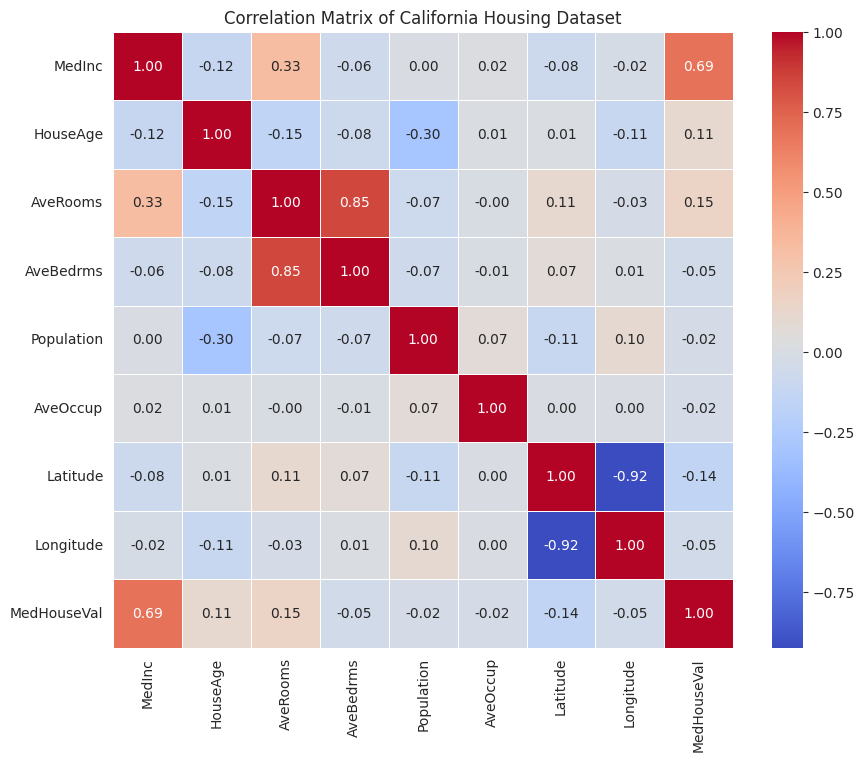

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of California Housing Dataset')
plt.show()

/tmp/ipython-input-1140465165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


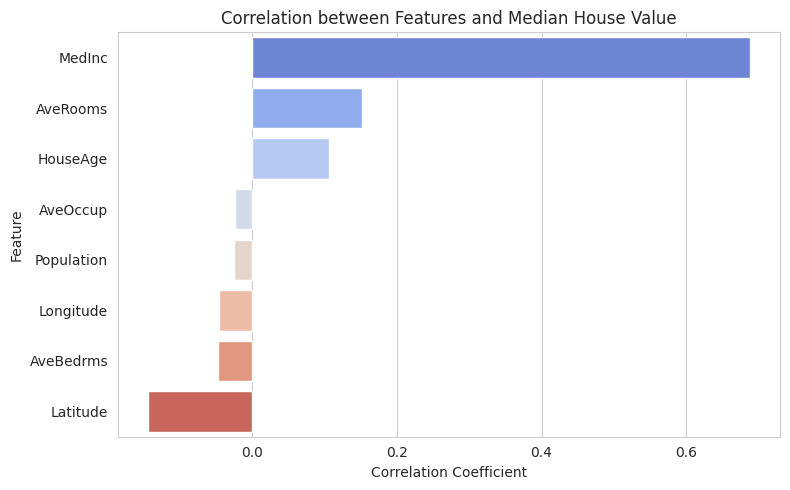

In [ ]:
corr = df.corr()['MedHouseVal'].sort_values(ascending=False).drop('MedHouseVal')

# Visualize correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlation between Features and Median House Value')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['MedHouseVal'], test_size = 0.20)

In [ ]:
clf =  DecisionTreeRegressor(max_depth=5)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Feature importance based on decrease in impurity
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
clf.feature_importances_

array([0.76581938, 0.03483774, 0.02380722, 0.        , 0.00532607,
       0.14414537, 0.02529329, 0.00077091])

/tmp/ipython-input-2051343439.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


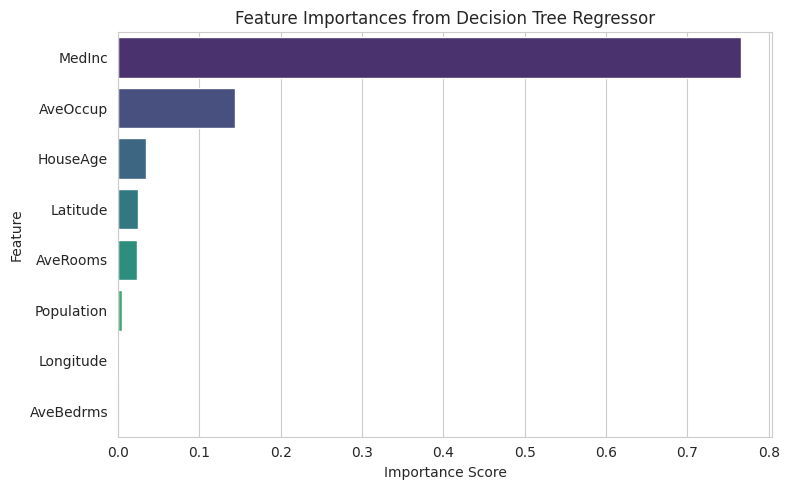

In [ ]:
# Feature importances
importances = clf.feature_importances_
features = df.columns[:-1]

# Create a sorted dataframe for easy plotting
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importances from Decision Tree Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
)
import numpy as np

y_pred = clf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape*100:.2f}%")

# Decision Tree model explains about 62.3% of the variance, while the remaining 38% is unexplained noise or missing information.
# The mean absolute error is 0.534. As the target variable is in the unit of $100k, we are off by around $53k on average.
# RMSE penalizes big misses more heavily. Thus, some extreme predictions seem to be further off.
# On average, your predictions are 32% away from the true value.

R²: 0.623
MAE: 0.534
RMSE: 0.726
MAPE: 32.06%


In [ ]:
# regression loss measures
mean_absolute_percentage_error(y_test, clf.predict(X_test))

0.3205662542533392

In [ ]:
y_pred = clf.predict(X_test)

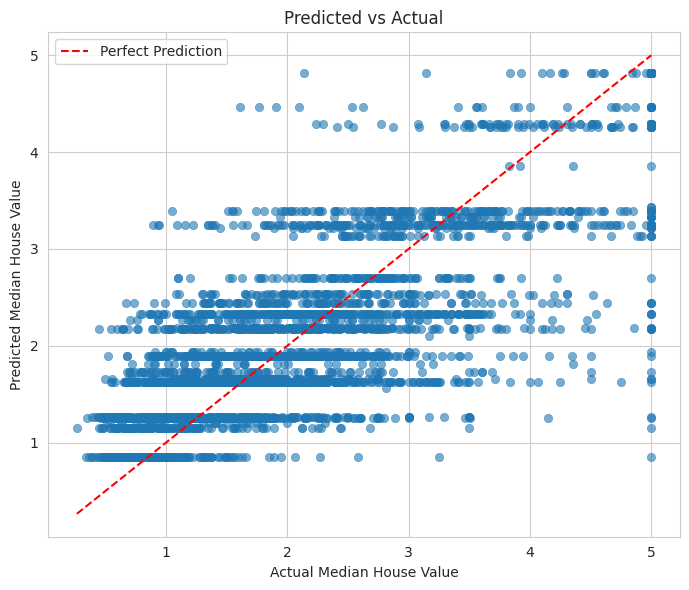

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    alpha=0.6,
    edgecolor=None
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label='Perfect Prediction'
)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


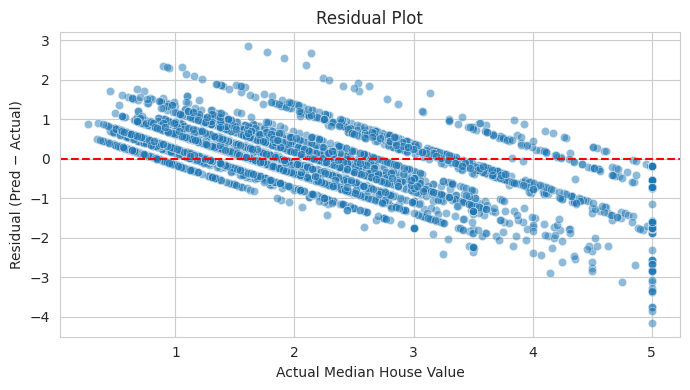

In [ ]:
residuals = y_pred - y_test
plt.figure(figsize=(7,4))
sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Residual (Pred − Actual)')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


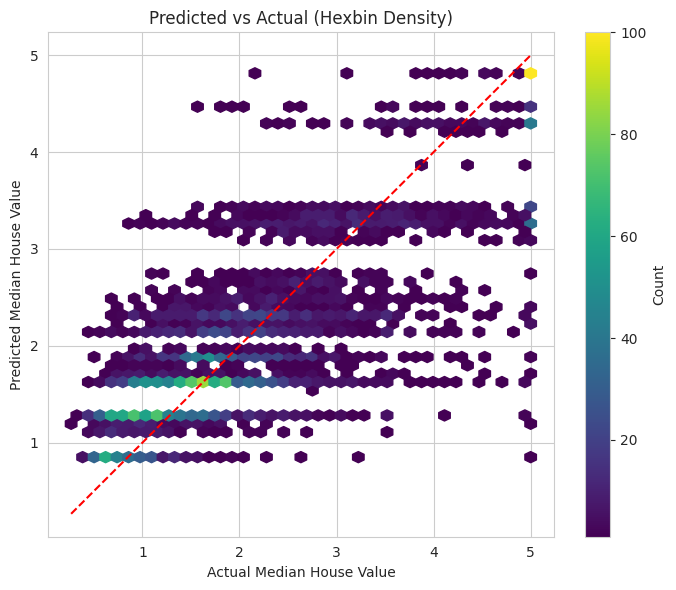

In [ ]:
plt.figure(figsize=(7,6))
hb = plt.hexbin(y_test, y_pred, gridsize=40, cmap='viridis', mincnt=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.colorbar(hb, label='Count')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual (Hexbin Density)')
plt.tight_layout()
plt.show()


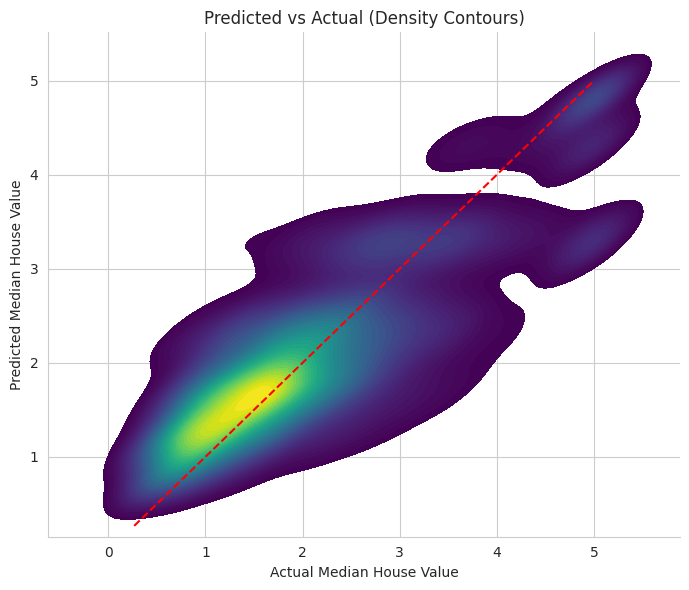

In [ ]:
plt.figure(figsize=(7,6))
sns.kdeplot(x=y_test, y=y_pred, fill=True, cmap='viridis', thresh=0.05, levels=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual (Density Contours)')
sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipython-input-2625751400.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pred = df_eval.groupby('bin')[['actual', 'pred']].mean()


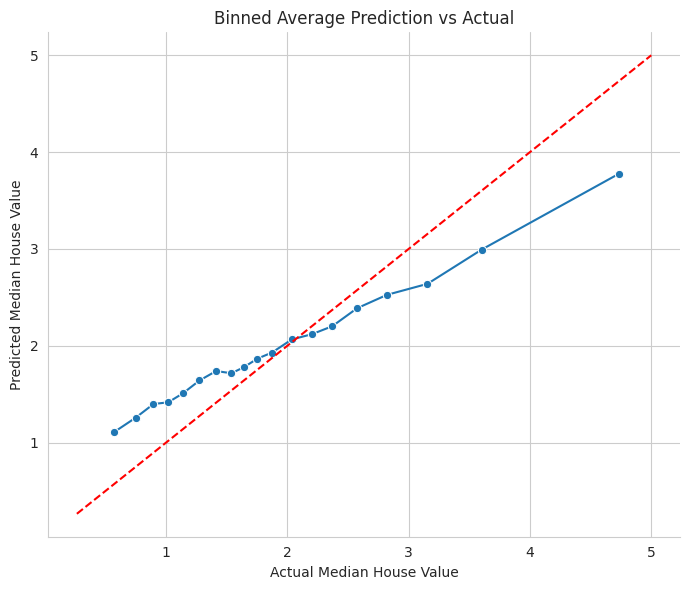

In [ ]:
df_eval = pd.DataFrame({'actual': y_test, 'pred': y_pred})
df_eval['bin'] = pd.qcut(df_eval['actual'], q=20, duplicates='drop')
mean_pred = df_eval.groupby('bin')[['actual', 'pred']].mean()

plt.figure(figsize=(7,6))
sns.lineplot(data=mean_pred, x='actual', y='pred', marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Binned Average Prediction vs Actual')
sns.despine()
plt.tight_layout()
plt.show()

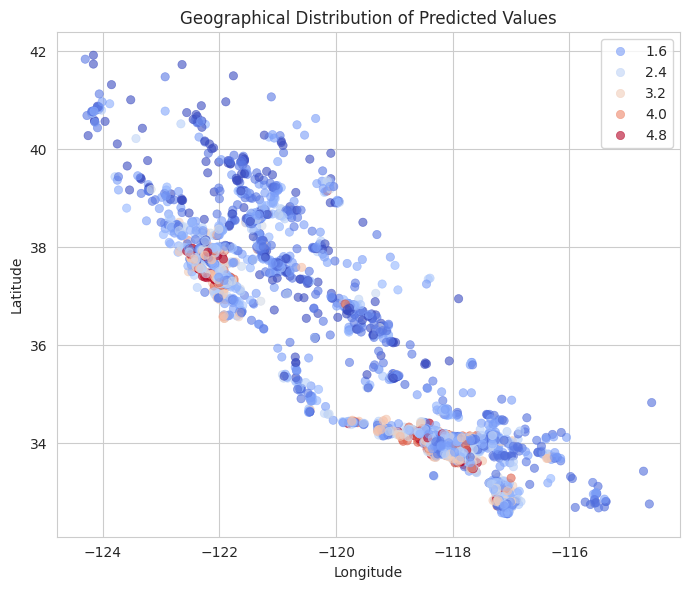

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.scatterplot(
    x=X_test['Longitude'],
    y=X_test['Latitude'],
    hue=y_pred,
    palette='coolwarm',
    alpha=0.6,
    edgecolor=None
)
plt.title("Geographical Distribution of Predicted Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

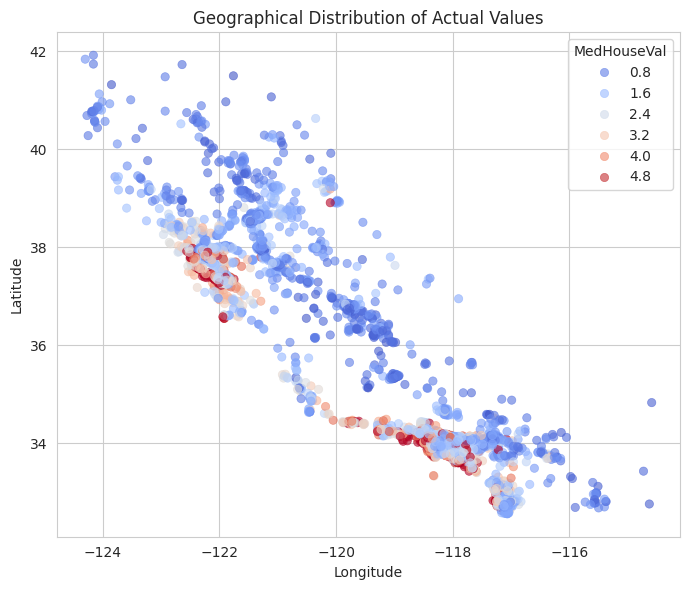

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_test['Longitude'],
    y=X_test['Latitude'],
    hue=y_test,
    palette='coolwarm',
    alpha=0.6,
    edgecolor=None
)
plt.title("Geographical Distribution of Actual Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()
